In [2]:
import os
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [3]:
file_path = Path("Resources/housing_prices_month_aggregate_clean.csv") 
housing_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
housing_data.head()

,Median Sale Price
Date,
2012-02-29,309511.1111
2012-03-31,313230.5556
2012-04-30,325841.1111
2012-05-31,335194.4444
2012-06-30,331952.2222


In [5]:
file_path = Path("Resources/housing_prices_month_clean_transposed.csv") 
housing_town_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
housing_town_data.head()

,Auburn,Bainbridge Island,Bellevue,Bothell,Brier,Burien,Des Moines,DuPont,Edmonds,Everett,...,Seattle - Magnolia,Seattle - Queen Anne,Seattle - South Lake Union,Seattle - Wallingford,Seattle - West Seattle,Shoreline,Snoqualmie,Tacoma,Tukwila,Woodinville
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,188000,407000,370000,314000,540000,181000,185000,285000,320000,181000,...,441250.0,458750.0,329000.0,472000.0,285000.0,247000,377000,141000,122000,353000
2012-02-29,206000,483000,418000,325000,500000,194000,151000,261000,320000,187000,...,469000.0,461000.0,329000.0,488000.0,290000.0,235000,439000,140000,148000,433000
2012-03-31,197000,500000,445000,315000,275000,211000,168000,267000,300000,200000,...,473900.0,463000.0,318500.0,490000.0,320000.0,246000,412000,145000,163000,427000
2012-04-30,209000,527000,460000,325000,500000,194000,175000,260000,325000,190000,...,485600.0,477000.0,325000.0,545000.0,311000.0,252000,443000,155000,120000,410000
2012-05-31,225000,453000,485000,318000,310000,220000,189000,270000,358000,185000,...,494000.0,455000.0,318000.0,558000.0,326000.0,297000,448000,160000,69000,498000


In [9]:
file_path = Path("Resources/Asset_Prices_Month.csv") 
asset_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
asset_data.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76


In [10]:
asset_data_refined_1 = asset_data.drop(columns=["MSFT", "BTC", "Gold", "BA", "30 T-Bond"])
asset_data_refined_1.head()

,AMZN
Date,
2012-02-29,179.69
2012-03-31,202.51
2012-04-30,231.90
2012-05-31,212.91
2012-06-30,228.35


In [11]:
amzn_housing_data = pd.concat([asset_data_refined_1, housing_data], axis="columns", join="inner")
amzn_housing_data.head()

,AMZN,Median Sale Price
Date,,
2012-02-29,179.69,309511.1111
2012-03-31,202.51,313230.5556
2012-04-30,231.90,325841.1111
2012-05-31,212.91,335194.4444
2012-06-30,228.35,331952.2222


In [13]:
amzn_housing_data.columns

Index(['AMZN', 'Median Sale Price'], dtype='object')

In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [35]:
data = amzn_housing_data
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1].values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

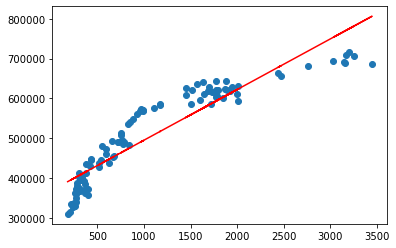

In [36]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [37]:
r_sq = lr.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8434054230953087


In [38]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: [367756.72434779]
slope: [[127.11514602]]


In [39]:
model = sm.OLS(Y, X)
X = sm.add_constant(X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              399.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    6.58e-38
Time:                        18:14:36   Log-Likelihood:                         -1489.8
No. Observations:                 108   AIC:                                      2982.
Df Residuals:                     107   BIC:                                      2984.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------